In [2]:
import xarray as xr
import numpy as np
import scipy

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
import nc_time_axis
import cftime

from matplotlib.dates import (AutoDateLocator, YearLocator, MonthLocator,
                              DayLocator, WeekdayLocator, HourLocator,
                              MinuteLocator, SecondLocator, MicrosecondLocator,
                              RRuleLocator, rrulewrapper, MONTHLY,
                              MO, TU, WE, TH, FR, SA, SU, DateFormatter,
                              AutoDateFormatter, ConciseDateFormatter)

# import cartopy.crs as ccrs
# import cartopy

from netCDF4 import Dataset # To write NetCDF files
from time import sleep
import sys
from tqdm.notebook import tqdm_notebook # For progress bar on loops

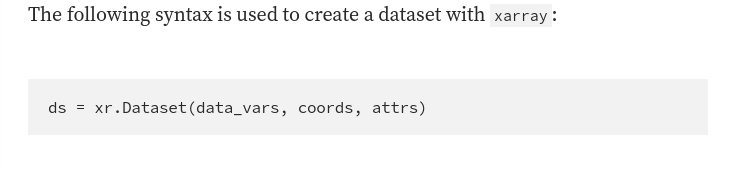

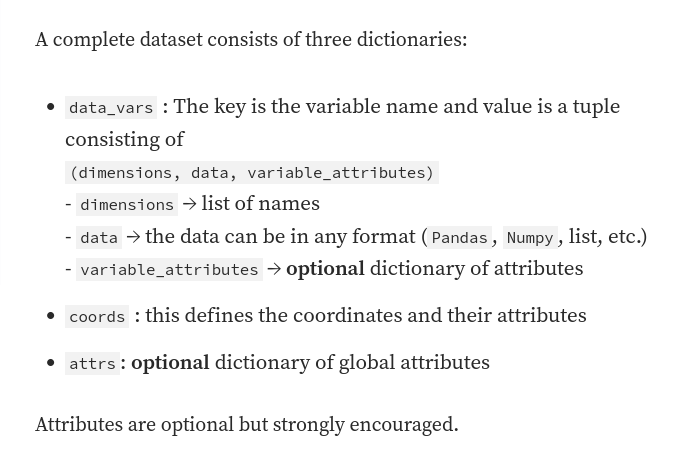

In [7]:
data_vars = {'temperature':( 
             ['time'], # dimensions
             [1,1,1,1,1], # data
             {'units' : 'K',
              'long_name' : 'Temperature as taken by Marcin'}# variable attributes (it's own dictionary)
                )}
            

In [8]:
ds = xr.Dataset(data_vars)

<xarray.Dataset>
Dimensions:      ()
Data variables:
    temperature  int64 5

In [4]:
data_vars

{'temperature': (['time'],
  [200, 210, 220, 230, 220, 210],
  {'units': 'K', 'long_name': 'Temperature as taken by Marcin'})}

In [3]:
# Assign coords
da = xr.open_dataset("/home/phymku/Data/RR_ANALYSIS/datasets/SOR_RR_DATA/FWmaHIST_ne0CONUSne30x8_ne0CONUSne30x8_mt12_no_conus_gravity_waves_mmk_subset_full")
da.assign_coords({"z3": (da.Z3)})



<xarray.Dataset>
Dimensions:    (time: 8736, lev: 110, ncol: 1, ilev: 111, nbnd: 2)
Coordinates:
  * ilev       (ilev) float64 4.949e-06 7.618e-06 1.173e-05 ... 985.1 1e+03
  * lev        (lev) float64 6.14e-06 9.453e-06 1.455e-05 ... 957.5 976.3 992.6
  * time       (time) object 2010-01-01 00:00:00 ... 2010-12-30 23:00:00
    z3         (time, lev, ncol) float32 ...
Dimensions without coordinates: ncol, nbnd
Data variables: (12/13)
    CO         (time, lev, ncol) float32 ...
    CO2        (time, lev, ncol) float32 ...
    HOX        (time, lev, ncol) float32 ...
    O          (time, lev, ncol) float32 ...
    O3         (time, lev, ncol) float32 ...
    U          (time, lev, ncol) float32 ...
    ...         ...
    time_bnds  (time, nbnd) object ...
    OMEGA      (time, lev, ncol) float32 ...
    T          (time, lev, ncol) float32 ...
    Z3         (time, lev, ncol) float32 ...
    lat        (time, ncol) float64 ...
    lon        (time, ncol) float64 ...
Attributes: (12/13)
    ne:                0
    np:                4
    Conventions:       CF-1.0
    source:            CAM
    case:              FWmaHIST_ne0CONUSne30x8_ne0CONUSne30x8_mt12_no_conus_g...
    logname:           nadavis
    ...                ...
    initial_file:      /glade/p/cgd/amp/pel/inic/waccm-conus-FW-nlev110.i.nc
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/se/ne30x...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Mar 16 05:07:12 2023: ncks -v CO,CO2,O,O3,HOX,U,V ...
    NCO:               netCDF Operators version 5.0.3 (Homepage = http://nco....

# Operations

In [11]:
data_vars = {'temperature':( 
             ['time'], # dimensions
             [1,2,3,2,1], # data
             {'units' : 'K',
              'long_name' : 'Temperature as taken by Marcin'}# variable attributes (it's own dictionary)
                )}
ds = xr.Dataset(data_vars)

# sum
print(ds.sum(dim="time").values)

# mean
print(ds.mean(dim="time").values)

<bound method Mapping.values of <xarray.Dataset>
Dimensions:      ()
Data variables:
    temperature  int64 9>
<bound method Mapping.values of <xarray.Dataset>
Dimensions:      ()
Data variables:
    temperature  float64 1.8>


# Changing x ticks if x is time

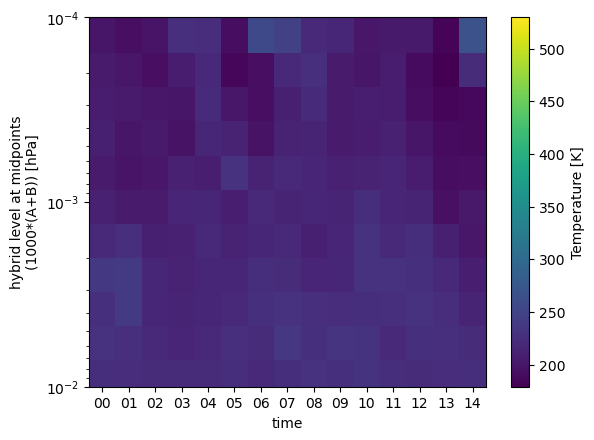

In [25]:
da['T'].isel(time=np.arange(0,15)).plot(x="time", y="lev",ylim=[1e-2,1e-4],yscale="log")
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set x-ticks every 1 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))  # Format the x-tick labels

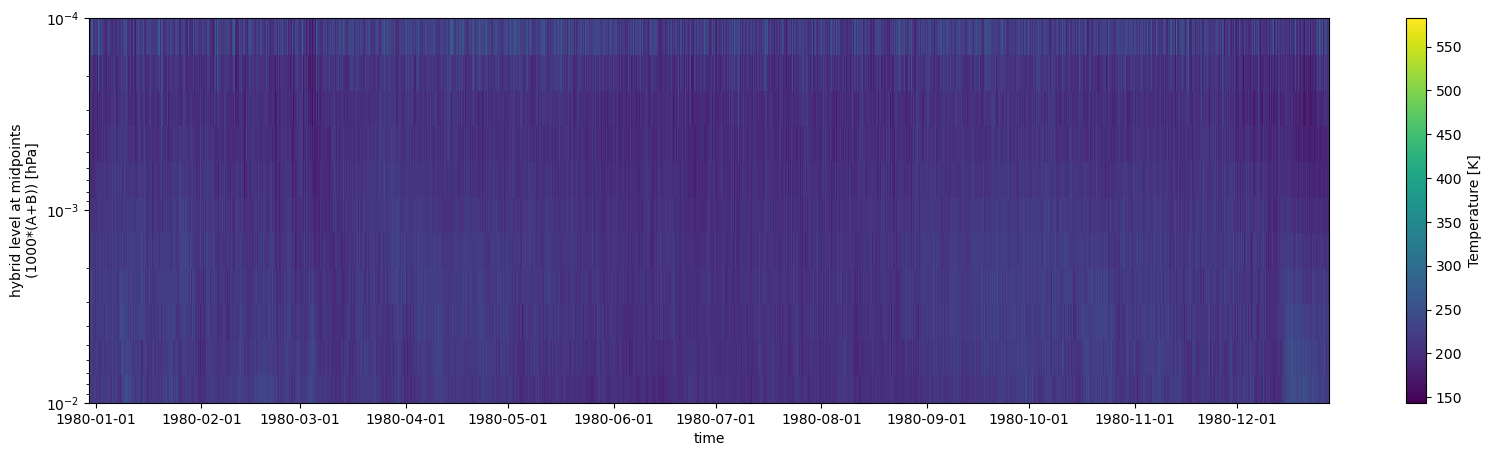

In [36]:
da['T'].plot(x="time", y="lev",ylim=[1e-2,1e-4],yscale="log", figsize=(20,5))
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set x-ticks every 1 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the x-tick labels


In [ ]:
a = xr.Dataset({'data':(
                            ['x'],
                            [1,2,3,2,np.nan],
    
                       )                    
              })

# Playground 

In [2]:
import numpy as np
2 + np.nan

nan

In [4]:
data_vars1 = {'temperature':
              ( 
                 ['time'], # dimensions
                 [1,2,3,4,5, np.nan], # data
                 {'units' : 'K',
                  'long_name' : 'Temperature as taken by Marcin'}# variable attributes (it's own dictionary)
              )
             }
data_vars2 = {'temperature':( 
             ['time'], # dimensions
             [1,np.nan,3,4,5,6], # data
             {'units' : 'K',
              'long_name' : 'Temperature as taken by Marcin'}# variable attributes (it's own dictionary)
                )}

In [7]:
test = {'test_data':
            (
                ['x','y','z'],                        #dimensions
                np.random.rand(6*4*3).reshape(6,4,3), #data
                {                                     # Attributes
                    'units' : 'cm$^{-3}$',
                    'long_name' : ' Test name',
                    'some bullshit attribute' : 2,
                }
            )
       }

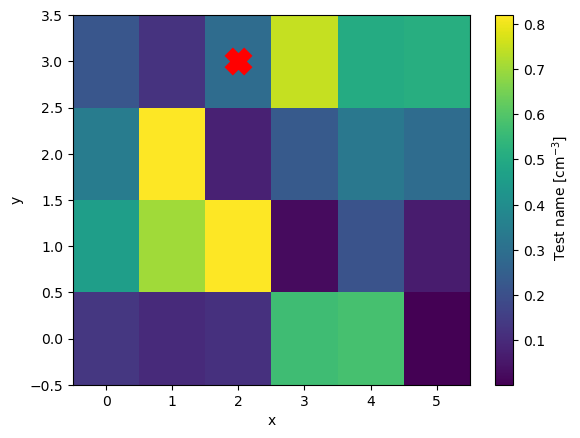

In [8]:
import matplotlib.pyplot as plt
import xarray as xr
ds = xr.Dataset(test)
ds['test_data'].isel(z=2).plot(y="y")
plt.scatter(2,3, marker="x", linewidth=20 ,c = "r")
